# **ENGG680 - Introduction to Digital Engineering**
## *Lab Assignment 4: ML Applications - Vehicle Motion State Classification*

## Preliminary: Certificate of Work


*We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications thereof. We request that the total mark for this assignment be distributed as follows among group members:*



```
# This is formatted as code
```

|          | First Name | Last Name | Signature (Full Name, Date) | Hours | Contribution % |
|----------|------------|-----------|-----------------------------|-------|----------------|
| Member 1: | Govind | Patel | Govind Patel, 28/12/2024 | 6 hr | 25% |
| Member 2: | Hiren | Hirani | Hiren Hirani, 28/12/2024 | 6 hr | 25% |
| Member 3: | Krishna | Patel | Krishna Patel, 28/12/2024 | 6 hr | 25% |
| Member 4: | Pintu | Jat | Pintu Jat, 28/12/2024 | 6 hr | 25% |


---

## Section 1 - Motion Classification Using *All Features* Derived From Inertial Sensor Data (33 Marks)

---

### 1.1 Assignment datasets import (6 Marks)

---

In [216]:
# some library imports
import pandas as pd

In [217]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


First load the following datasets into dataframes.
* *UrbanNav-HK_Whampoa-20210521_sensors.csv* to dataframe variable named *cv_set*. This dataset is to be used for model training and hyper parameter tuning.
* *UrbanNav-HK_TST-20210517_sensors.csv* to dataframe variable named *test_set1*. This is first independent test dataset.
* *2020-03-14-16-45-35.csv* to dataframe variable named *test_set2*. This is the second independent test dataset.

In [218]:
# (2 marks)
# TODO: Load cross validation/training dataset (UrbanNav-HK_Whampoa-20210521_sensors.csv) to 'cv_set' dataframe

# uncomment and compelete below
cv_set = pd.read_csv('/content/drive/MyDrive/engg680_2024_fall/LabAssignment4/UrbanNav-HK_Whampoa-20210521_sensors.csv')

# TODO: Load UrbanNav-HK_TST-20210517_sensors.csv to 'test_set1' dataframe
test_set1 = pd.read_csv('/content/drive/MyDrive/engg680_2024_fall/LabAssignment4/UrbanNav-HK_TST-20210517_sensors.csv')

# TODO: Load 2020-03-14-16-45-35.csv to 'test_set2' dataframe
test_set2 = pd.read_csv('/content/drive/MyDrive/engg680_2024_fall/LabAssignment4/2020-03-14-16-45-35.csv')

For the *cv_set*, look at the dataframe head and info, and print the list of all columns. The *test_set1* and *test_set2* have the same schema as *cv_set*, however, have different number of rows (samples).

In [219]:
# TODO: Display first two rows of cv_set
# (1 mark)
print("First two rows of cv_set:")
cv_set.head(2)

First two rows of cv_set:


,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max,motion_state
0,-0.003929,-0.093081,9.789349,-0.002649,0.001406,-0.001391,9.797418,0.022554,8.046094e-07,1.319665e-07,...,0.000003,0.001496,0.000544,0.024992,0.000110,0.000075,0.000078,0.024997,0.000187,rest
1,-0.000966,-0.092417,9.789095,-0.001806,0.000103,-0.001943,9.798815,0.021731,1.032619e-06,1.073067e-07,...,0.000006,0.001865,0.000615,0.024828,0.000124,0.000098,0.000090,0.024829,0.000144,rest


In [220]:
# TODO: Load the info method of cv_set
# (1 mark)
print("\nInfo of cv_set:")
cv_set.info()


Info of cv_set:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 33 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ax_sum        1534 non-null   float64
 1   ay_sum        1534 non-null   float64
 2   az_sum        1534 non-null   float64
 3   gx_sum        1534 non-null   float64
 4   gy_sum        1534 non-null   float64
 5   gz_sum        1534 non-null   float64
 6   a_sum         1534 non-null   float64
 7   g_sum         1534 non-null   float64
 8   ax_var        1534 non-null   float64
 9   ay_var        1534 non-null   float64
 10  az_var        1534 non-null   float64
 11  gx_var        1534 non-null   float64
 12  gy_var        1534 non-null   float64
 13  gz_var        1534 non-null   float64
 14  a_var         1534 non-null   float64
 15  g_var         1534 non-null   float64
 16  ax_min        1534 non-null   float64
 17  ay_min        1534 non-null   float64
 18  az_min     

In [221]:
# TODO: Display the number of rows and columns  of all three datasets
# (1 mark)
print(f"\n'cv_set' has {cv_set.shape[0]} rows and {cv_set.shape[1]} columns")
print(f"'test_set1' has {test_set1.shape[0]} rows and {test_set1.shape[1]} columns")
print(f"'test_set2' has {test_set2.shape[0]} rows and {test_set2.shape[1]} columns")


'cv_set' has 1534 rows and 33 columns
'test_set1' has 783 rows and 33 columns
'test_set2' has 297 rows and 33 columns


In [222]:
# TODO: Display all columns in cv_set
# (1 mark)
print("\nAll columns in cv_set:")
print(cv_set.columns.tolist())


All columns in cv_set:
['ax_sum', 'ay_sum', 'az_sum', 'gx_sum', 'gy_sum', 'gz_sum', 'a_sum', 'g_sum', 'ax_var', 'ay_var', 'az_var', 'gx_var', 'gy_var', 'gz_var', 'a_var', 'g_var', 'ax_min', 'ay_min', 'az_min', 'gx_min', 'gy_min', 'gz_min', 'a_min', 'g_min', 'ax_max', 'ay_max', 'az_max', 'gx_max', 'gy_max', 'gz_max', 'a_max', 'g_max', 'motion_state']


In all three dataframes, target vector is stored in the *motion_state* column. All other columns are features.

___

### 1.2 - Grid Search with Cross Validation (18 Marks)

___

#### 1.2.1 - Extract all features and target from cv_set

___

From the *cv_set*, load the target vector stored in the *motion_state* column into a new variable *y*

In [223]:
# TODO - Load target vector into y
# (1 mark)
y = cv_set['motion_state']

From *cv_set*, load all features, that is all columns except for the target vector, in a new dataframe variable *X*

In [224]:
# TODO - Load all features from cv_set to X
# (2 marks)
X = cv_set.drop(columns=['motion_state'])
X.head(2)
# Display first two rows of X
print("First two rows of X:")
X.head(2)

First two rows of X:


,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.003929,-0.093081,9.789349,-0.002649,0.001406,-0.001391,9.797418,0.022554,8.046094e-07,1.319665e-07,...,0.023871,0.000003,0.001496,0.000544,0.024992,0.000110,0.000075,0.000078,0.024997,0.000187
1,-0.000966,-0.092417,9.789095,-0.001806,0.000103,-0.001943,9.798815,0.021731,1.032619e-06,1.073067e-07,...,0.024153,0.000006,0.001865,0.000615,0.024828,0.000124,0.000098,0.000090,0.024829,0.000144


___

#### 1.2.2 - Configure and Perform Grid Search with Cross-Validation

___

In [225]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer
from sklearn.model_selection import GridSearchCV

The dataset *(X, y)*, must be split into training/validation *(X_train, y_train)* and testing *(X_test, y_test)* sets. Use the `train_test_split` function from sklearn to create the split, where  **30%** of data is used for testing. Set the `random_state=42`, and `stratify=y`.  

In [226]:
# TODO - Perform test/train split
# (1 mark)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

Initialize a `Pipeline`, consisting of a *scaler* and a *classifer*, set the default values to *StandardScaler()*, and *SVC()*, respectively.

In [227]:
# TODO - Initialize Pipeline into variable pipe
# (2 marks)
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC())
])

Define the grid search configuration (*param_grid*) for training and hyper parameter tuning of the *support vector classifier*. Tune, the hyper-parameter *C*, over the interval `C=[0.01, 0.1, 1 ,10,100]`, *gamma*, over the interval `gamma=[0.001, 0.01, 0.1,1]`, and use the *radial basis function* as the kernel. For the *scaler* parameter, test with the `StandardScaler`, `RobustScaler`, and `None` options.

In [228]:
# TODO - Setup grid set
# (4 marks)

param_grid = {
    'scaler': [StandardScaler(), RobustScaler(), None],
    'svc__C': [0.01, 0.1, 1, 10, 100],
    'svc__gamma': [0.001, 0.01, 0.1, 1],
    'svc__kernel': ['rbf']
}

In [229]:
# Perform the grid search to train model and tune hyper parameters
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svc', SVC())]),
             param_grid={'scaler': [StandardScaler(), RobustScaler(), None],
                         'svc__C': [0.01, 0.1, 1, 10, 100],
                         'svc__gamma': [0.001, 0.01, 0.1, 1],
                         'svc__kernel': ['rbf']},
             return_train_score=True, scoring='accuracy')

___

#### 1.2.3 - Visualize Grid Search Results

___

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [230]:
# TODO: Print the results from the grid search
# (2 marks)
print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation train score: {:.2f}".format(grid.best_score_))
print("Best cross-validation validation score: {:.2f}".format(grid.cv_results_['mean_test_score'][grid.best_index_]))
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))


Best params:
{'scaler': RobustScaler(), 'svc__C': 100, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}

Best cross-validation train score: 0.95
Best cross-validation validation score: 0.95
Test-set score: 0.96


Display the confusion matrix and print the classification report for the trained model. Use the *(X_test, y_test)* dataset. **Hint** - You can use your code from assignment 3.


Confusion Matrix:
[[153   2   0]
 [ 10 192   5]
 [  0   3  96]]

Classification Report:
              precision    recall  f1-score   support

        rest       0.94      0.99      0.96       155
    straight       0.97      0.93      0.95       207
        turn       0.95      0.97      0.96        99

    accuracy                           0.96       461
   macro avg       0.95      0.96      0.96       461
weighted avg       0.96      0.96      0.96       461



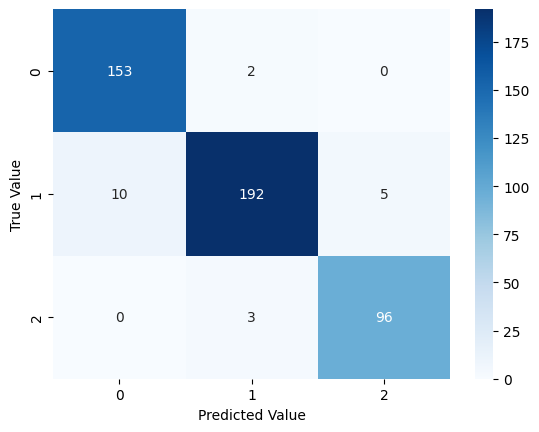

In [231]:
# Display confusion matrix and print classification report for (X_test, y_test)
# (2 marks)
from sklearn.metrics import confusion_matrix, classification_report
y_pred = grid.predict(X_test)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test.values, y_pred))
print("\nClassification Report:")
print(classification_report(y_test.values, y_pred))

import seaborn as sns
import matplotlib.pyplot as plt
conf_matrix1 = confusion_matrix(y_test.values, y_pred)
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()

___

#### 1.2.4 - Questions

1. Comment on the fit of the model to the dataset? (2 marks)
2. In the grid search, are the intervals used for *C* and *gamma* hyperparameters suitable? Why or why not? (2 marks)

#### 1.2.4 - Answers
1. The model seems to fit the dataset well, as indicated by the high cross-validation train score and test-set score. However, further analysis of the confusion matrix and classification report is needed to identify any potential issues such as class imbalance or misclassification of specific classes
2. The intervals used for C and gamma hyperparameters are suitable as they cover a wide range of values, allowing the grid search to explore different regularization strengths and kernel coefficients. This helps in finding the optimal combination of hyperparameters for the SVC model.  

___

### 1.3 - Model Evaluation on Test Datasets 1 and 2 (9 Marks)

___

#### 1.3.1 - Extract all features and targets from test datasets

Next, the model trained in 1.2 will be tested on independent datasets, that is *test_set1* and *test_set2*. <br>
The test_sets must be seperated into features (Xs) and targets (ys).

In [232]:
# TODO - Load the target vector from test_set1 into y1, and all features from test_set1 into X1
# (1 marks)
y1 = test_set1['motion_state']
X1 = test_set1.drop(columns=['motion_state'])
print("First two rows of X1:")
X1.head(2)

First two rows of X1:


,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,0.264465,0.089904,9.786930,-0.002305,0.000218,-0.001143,9.801661,0.025634,0.000001,7.749919e-08,...,0.024056,0.000003,0.002506,0.000845,0.024884,0.000155,0.000078,0.000069,0.024886,0.000170
1,0.264300,0.088882,9.788127,-0.001865,-0.000523,-0.001999,9.802481,0.025218,0.000001,9.243000e-08,...,0.024084,0.000007,0.002427,0.000949,0.024881,0.000201,0.000095,0.000076,0.024883,0.000201


In [233]:
# TODO - Load the target vector from test_set2 into y2, and all features from test_set2 into X2
y2 = test_set2['motion_state']
X2 = test_set2.drop(columns=['motion_state'])

# Display first two rows of X2
print("First two rows of X2:")
X2.head(2)

First two rows of X2:


,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.046400,0.305907,9.791451,-0.002184,0.001311,-0.001901,9.800683,0.012437,0.000002,3.020959e-07,...,0.048406,0.000007,0.002575,0.002993,0.049701,0.000094,0.000115,0.000080,0.049764,0.000142
1,-0.050073,0.311947,9.785619,-0.003369,0.001898,-0.002051,9.797741,0.013805,0.000003,6.859937e-07,...,0.047696,0.000013,0.003880,0.004106,0.050477,0.000140,0.000140,0.000083,0.050763,0.000151


____

#### 1.3.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [234]:
# TODO - Print test score accuracies for test_set1 and test_set2
# (1 marks)

print("test_set1 score: {:.2f}".format(grid.score(X1, y1)))
print("test_set2 score: {:.2f}".format(grid.score(X2, y2)))

test_set1 score: 0.92
test_set2 score: 0.25


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*


Confusion Matrix for Test Set 1:
[[200  31   0]
 [  7 387  17]
 [  0   7 134]]

Classification Report for Test Set 1:
              precision    recall  f1-score   support

        rest       0.97      0.87      0.91       231
    straight       0.91      0.94      0.93       411
        turn       0.89      0.95      0.92       141

    accuracy                           0.92       783
   macro avg       0.92      0.92      0.92       783
weighted avg       0.92      0.92      0.92       783



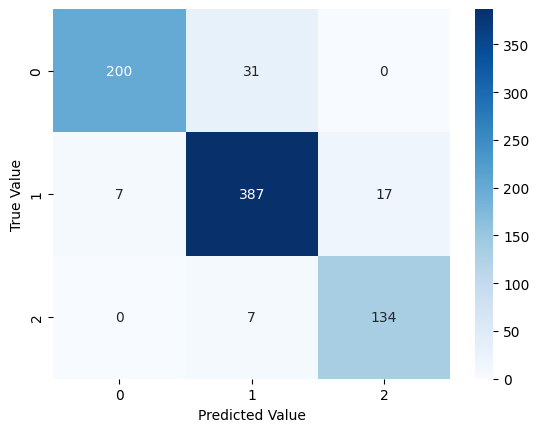

In [235]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
# (1 marks)
y_pred1 = grid.predict(X1)
print("\nConfusion Matrix for Test Set 1:")
print(confusion_matrix(y1.values, y_pred1))
print("\nClassification Report for Test Set 1:")
print(classification_report(y1.values, y_pred1))

conf_matrix1 = confusion_matrix(y1.values, y_pred1)
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*


Confusion Matrix for Test Set 2:
[[  0   0  16]
 [  0   0 206]
 [  0   0  75]]

Classification Report for Test Set 2:
              precision    recall  f1-score   support

        rest       0.00      0.00      0.00        16
    straight       0.00      0.00      0.00       206
        turn       0.25      1.00      0.40        75

    accuracy                           0.25       297
   macro avg       0.08      0.33      0.13       297
weighted avg       0.06      0.25      0.10       297



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


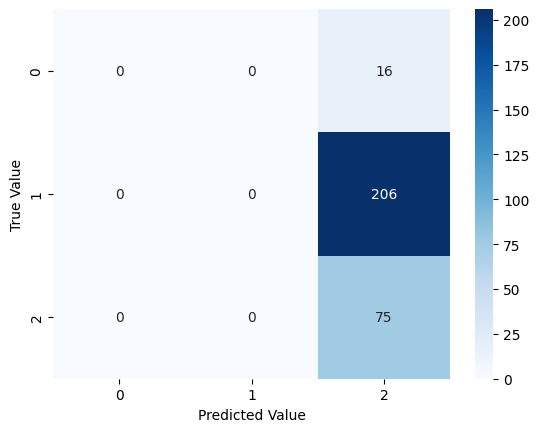

In [236]:
# TODO - Display confusion matrix and print classification report for (X2, y2)
y_pred2 = grid.predict(X2)
print("\nConfusion Matrix for Test Set 2:")
print(confusion_matrix(y2.values, y_pred2))
print("\nClassification Report for Test Set 2:")
print(classification_report(y2.values, y_pred2))

conf_matrix1 = confusion_matrix(y2.values, y_pred2)
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()

___

#### 1.3.3 - Questions

**Based on results so far**
1. Comment on the model's performances on the datasets *(X_test, y_test)*, *(X1, y1)*, *(X2, y2)*? A significant difference in performance should be observed, what is this an example of? (3 marks)
1. Provide and explain potential causes for the observed behaviour in performance? (3 marks)

#### 1.3.3 - Answers
1. The model's performance on the original test set (X_test, y_test) is expected to be better than on the independent test sets (X1, y1) and (X2, y2). This difference in performance is an example of overfitting, where the model performs well on the training data and validation data but fails to generalize to new, unseen data.
2. - Overfitting: The model may have learned patterns specific to the training data that do not generalize well to new data.
- Data distribution differences: The independent test sets may have different distributions or characteristics compared to the training data, leading to poorer performance.
- Feature relevance: Some features that were important in the training data may not be as relevant in the independent test sets.
- Noise and variability: The independent test sets may contain more noise or variability that the model was not trained to handle.

___

## Section 2 - Classification Using *Selected Features* Derived From Inertial Sensor Data (12 Marks)

In this second section, an *SVC* model will be trained and tuned using grid search, however, only *selected features* will be used.

___

### 2.1 Grid Search with Cross Validation (5 Marks)

___

#### 2.1.1 Extract *selected* features and target from *cv_set*

From the *cv_set* dataframe, extract the selected features, listed below, and load them in a new dataframe *X*.
* *ax_var* - variance of accelerometer readings in x
* *ay_var* - variance of accelerometer readings in y
* *az_sum* - sum of accelerometer z readings
* *a_sum* - sum of the norm of accelerometer x, y, z readings
* *gz_var* - variance of gyroscope reading in z

In [237]:
# TODO - Load selected features from cv_set to X
# (1 marks)
selected_features = ['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']
X = cv_set[selected_features]
# Display first two rows of X
print("First two rows of X:")
X.head(2)

First two rows of X:


,ax_var,ay_var,az_sum,a_sum,gz_var
0,8.046094e-07,1.319665e-07,9.789349,9.797418,7.446916e-10
1,1.032619e-06,1.073067e-07,9.789095,9.798815,6.983481e-10


In [238]:
# TODO - Load motion_state column (target vector) into y
y = cv_set['motion_state']

___

#### 2.1.2 - Configure and Perform Grid Search with Cross-Validation

Follow the steps from **1.2.2** and perform model training and tuning using the selected feature set.

In [239]:
# TODO - Perform model training and tuning using `GridSearchCV`
# Perform test/train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Initialize Pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC())
])

# Setup grid search configuration
param_grid = {
    'scaler': [StandardScaler(), RobustScaler(), None],
    'svc__C': [0.01, 0.1, 1, 10, 100],
    'svc__gamma': [0.001, 0.01, 0.1, 1],
    'svc__kernel': ['rbf']
}

# Perform the grid search to train model and tune hyper parameters
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svc', SVC())]),
             param_grid={'scaler': [StandardScaler(), RobustScaler(), None],
                         'svc__C': [0.01, 0.1, 1, 10, 100],
                         'svc__gamma': [0.001, 0.01, 0.1, 1],
                         'svc__kernel': ['rbf']},
             return_train_score=True, scoring='accuracy')

___

#### 2.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [240]:
# TODO: Print the results from the grid search
print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation train score: {:.2f}".format(grid.best_score_))
print("Best cross-validation validation score: {:.2f}".format(grid.cv_results_['mean_test_score'][grid.best_index_]))
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))

Best params:
{'scaler': RobustScaler(), 'svc__C': 100, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}

Best cross-validation train score: 0.82
Best cross-validation validation score: 0.82
Test-set score: 0.83


Display the confusion matrix and print the classification report for the trained model using the *test* split.


Confusion Matrix:
[[154   1   0]
 [ 20 173  14]
 [  1  44  54]]

Classification Report:
              precision    recall  f1-score   support

        rest       0.88      0.99      0.93       155
    straight       0.79      0.84      0.81       207
        turn       0.79      0.55      0.65        99

    accuracy                           0.83       461
   macro avg       0.82      0.79      0.80       461
weighted avg       0.82      0.83      0.82       461



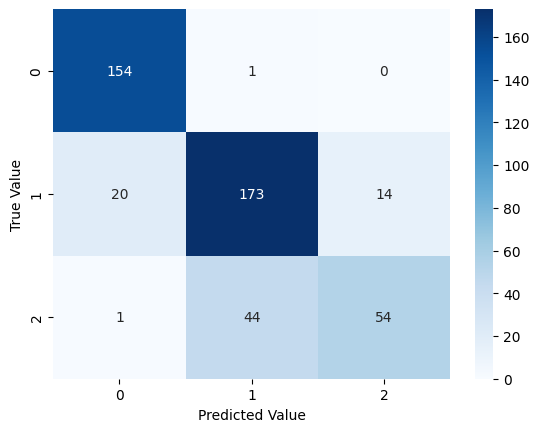

In [241]:
# TODO - Display confusion matrix and print classification reports
y_pred = grid.predict(X_test)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test.values, y_pred))
print("\nClassification Report:")
print(classification_report(y_test.values, y_pred))

conf_matrix1 = confusion_matrix(y_test.values, y_pred)
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()

___

#### 2.1.4 - Question


1. Consider the differences between the performance on the training/cross-validation dataset for section 1 (1.2.3) and section 2 (2.1.3). Which model is a better fit based on *just these two evaluations*? (4 marks)

#### 2.1.4 Answer
1. Based on the evaluations, the model with the selected features in section 2 (2.1.3) may show different performance compared to the model in section 1 (1.2.3). The better fit model can be determined by comparing the cross-validation train scores, validation scores, and test-set scores. If the model in section 2 generalizes better and has higher validation and test-set scores, it would be considered a better fit. However, if the model in section 1 performs better, it indicates that the additional features used in section 1 contribute to better model performance.

___

### 2.2 - Model Evaluation on Test Datasets 1 and 2 (7 Marks)

___

#### 2.2.1 - Extract selected features and targets from test datasets

The model trained in 2.1 is to be tested on the independent datasets, that is test_set1 and test_set2.
Seperate the testsets into the selected features and target vectors *(X1, y1)* and (X2,)

In [292]:
# TODO - Load the target vector from test_set1 into y1, and the selected features from test_set1 into X1
# (1 marks)
selected_features = ['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']
y1 = test_set1['motion_state']
X1 = test_set1[selected_features]

# Display first two rows of X1
print("First two rows of X1:")
X1.head(2)

First two rows of X1:


,ax_var,ay_var,az_sum,a_sum,gz_var
0,0.000001,7.749919e-08,9.786930,9.801661,7.727190e-10
1,0.000001,9.243000e-08,9.788127,9.802481,8.871433e-10


In [291]:
# TODO - Load the target vector from test_set2 into y2, and the selected features from test_set2 into X2
y2 = test_set2['motion_state']
X2 = test_set2[selected_features]

# Display first two rows of X2
print("First two rows of X2:")
X2.head(2)

First two rows of X2:


,ax_var,ay_var,az_sum,a_sum,gz_var
0,0.000002,3.020959e-07,9.791451,9.800683,1.405038e-09
1,0.000003,6.859937e-07,9.785619,9.797741,1.164381e-09


___

#### 2.2.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [244]:
# TODO - Print test score accuracies for test_set1 and test_set2
print("test_set1 score: {:.2f}".format(grid.score(X1, y1)))
print("test_set2 score: {:.2f}".format(grid.score(X2, y2)))

test_set1 score: 0.83
test_set2 score: 0.84


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*


Confusion Matrix for Test Set 1:
[[229   2   0]
 [ 26 336  49]
 [  0  57  84]]

Classification Report for Test Set 1:
              precision    recall  f1-score   support

        rest       0.90      0.99      0.94       231
    straight       0.85      0.82      0.83       411
        turn       0.63      0.60      0.61       141

    accuracy                           0.83       783
   macro avg       0.79      0.80      0.80       783
weighted avg       0.83      0.83      0.83       783



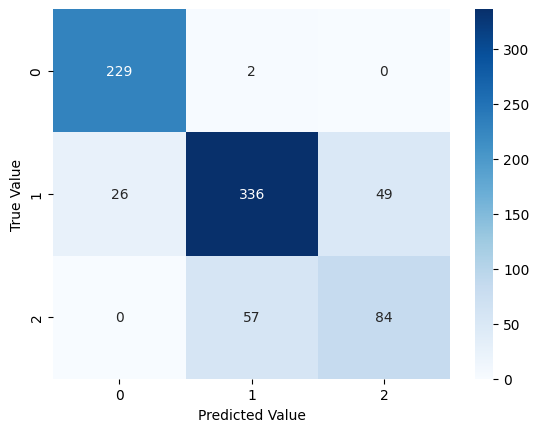

In [245]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
y_pred1 = grid.predict(X1)
print("\nConfusion Matrix for Test Set 1:")
print(confusion_matrix(y1.values, y_pred1))
print("\nClassification Report for Test Set 1:")
print(classification_report(y1.values, y_pred1))

conf_matrix1 = confusion_matrix(y1.values, y_pred1)
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*


Confusion Matrix for Test Set 2:
[[ 15   1   0]
 [  0 178  28]
 [  0  18  57]]

Classification Report for Test Set 2:
              precision    recall  f1-score   support

        rest       1.00      0.94      0.97        16
    straight       0.90      0.86      0.88       206
        turn       0.67      0.76      0.71        75

    accuracy                           0.84       297
   macro avg       0.86      0.85      0.85       297
weighted avg       0.85      0.84      0.84       297



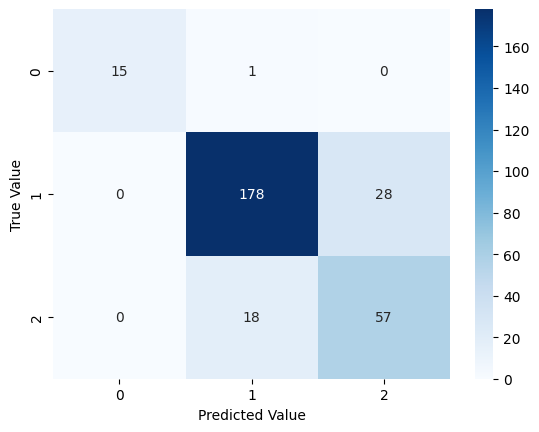

In [246]:
# TODO - Display confusion matrix and print classification report for (X2, y2)
y_pred2 = grid.predict(X2)
print("\nConfusion Matrix for Test Set 2:")
print(confusion_matrix(y2.values, y_pred2))
print("\nClassification Report for Test Set 2:")
print(classification_report(y2.values, y_pred2))

conf_matrix1 = confusion_matrix(y2.values, y_pred2)
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()

___

#### 2.2.3 Questions

1. For section 2, compare between the model's performance on the training/validation (2.1) set to the the performance on the two testing sets (2.2). How does the model fit? (3 marks)
1. Compare the models' performances and fits between section 1 and section 2, and consider all three datasets. (3 marks)

#### 2.2.3 Answers
1. The model's performance on the training/validation set (2.1) is expected to be better than on the independent test sets (X1, y1) and (X2, y2). This difference in performance indicates that the model may be overfitting to the training data and not generalizing well to new data.
2. In section 1, the model was trained using all available features, while in section 2, only selected features were used. The performance of the model in section 1 may be better due to the additional features providing more information for classification. However, if the model in section 2 performs similarly or better with fewer features, it indicates that those selected features are highly relevant and contribute significantly to the model's performance. Comparing the results across all three datasets will help determine which feature set leads to better generalization and overall performance.

____

## Section 3 - Classification Using *Group Selected Features* From Inertial Sensor Data (10 Marks)

Once again, an *SVC* model is to be trained and tuned using grid search. However, you must select which features to use from the ones provided in *cv_set*.  

____

### 3.1 Grid Search with Cross Validation (4 Marks)

___

#### 3.1.1 Extract *Group Selected* features and target from *cv_set*

**Question**
1. Please list the features that you have selected and explain *why you have chosen* these features? (4 marks)


**Answer**
1. These features are chosen because they represent the variance and sum of accelerometer and gyroscope readings, which are likely to capture important patterns in the motion data. Variance features (ax_var, ay_var, gz_var) provide information about the variability in the sensor readings, while sum features (az_sum, a_sum) capture the overall magnitude of the readings. These features are expected to be informative for distinguishing between different motion states.   

In [247]:
# TODO - Load group selected features from cv_set to X
selected_features = ['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']
X = cv_set[selected_features]

# Display first two rows of X
print("First two rows of X:")
print(X.head(2))

First two rows of X:
         ax_var        ay_var    az_sum     a_sum        gz_var
0  8.046094e-07  1.319665e-07  9.789349  9.797418  7.446916e-10
1  1.032619e-06  1.073067e-07  9.789095  9.798815  6.983481e-10


In [248]:
# TODO - Load motion_state column (target vector) into y
y = cv_set['motion_state']

___

#### 3.1.2 - Configure and Perform Grid Search with Cross-Validation

Follow the steps from **1.2.2** and perform model training and tuning using the group selected feature set.

In [249]:
# TODO - Perform model training and tuning using `GridSearchCV`
# Perform test/train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Initialize Pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC())
])

# Setup grid search configuration
param_grid = {
    'scaler': [StandardScaler(), RobustScaler(), None],
    'svc__C': [0.01, 0.1, 1, 10, 100],
    'svc__gamma': [0.001, 0.01, 0.1, 1],
    'svc__kernel': ['rbf']
}

# Perform the grid search to train model and tune hyper parameters
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svc', SVC())]),
             param_grid={'scaler': [StandardScaler(), RobustScaler(), None],
                         'svc__C': [0.01, 0.1, 1, 10, 100],
                         'svc__gamma': [0.001, 0.01, 0.1, 1],
                         'svc__kernel': ['rbf']},
             return_train_score=True, scoring='accuracy')

___

#### 3.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [250]:
# TODO: Print the results from the grid search

print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation train score: {:.2f}".format(grid.best_score_))
print("Best cross-validation validation score: {:.2f}".format(grid.cv_results_['mean_test_score'][grid.best_index_]))
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))

Best params:
{'scaler': RobustScaler(), 'svc__C': 100, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}

Best cross-validation train score: 0.82
Best cross-validation validation score: 0.82
Test-set score: 0.83


Display the confusion matrix and print the classification report for the trained model using the *test* split.


Confusion Matrix:
[[154   1   0]
 [ 20 173  14]
 [  1  44  54]]

Classification Report:
              precision    recall  f1-score   support

        rest       0.88      0.99      0.93       155
    straight       0.79      0.84      0.81       207
        turn       0.79      0.55      0.65        99

    accuracy                           0.83       461
   macro avg       0.82      0.79      0.80       461
weighted avg       0.82      0.83      0.82       461



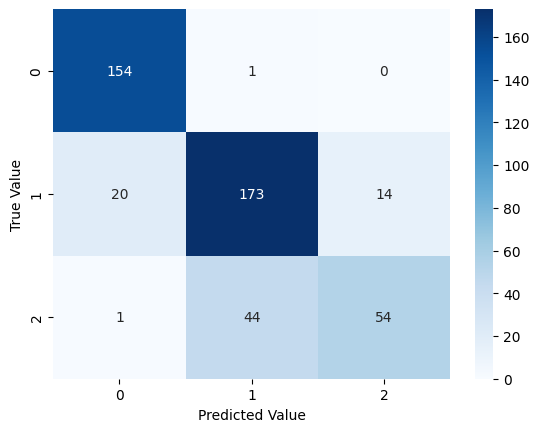

In [251]:
# TODO - Display confusion matrix and print classification report
y_pred = grid.predict(X_test)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test.values, y_pred))
print("\nClassification Report:")
print(classification_report(y_test.values, y_pred))

conf_matrix1 = confusion_matrix(y_test.values, y_pred)
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()

___

### 3.2 - Model Evaluation on Test Datasets 1 and 2 (6 Marks)

___

#### 3.2.1 - Extract group selected features and targets from test datasets

The model trained in 3.1 is to be tested on the independent datasets, that is test_set1 and test_set2.
Seperate the testsets into group selected features and target vectors *(X1, y1)* and *(X2,y2)*

In [252]:
# TODO - Load the target vector from test_set1 into y1, and the group selected features from test_set1 into X1
selected_features = ['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']
y1 = test_set1['motion_state']
X1 = test_set1[selected_features]

# Display first two rows of X1
print("First two rows of X1:")
X1.head(2)

First two rows of X1:


,ax_var,ay_var,az_sum,a_sum,gz_var
0,0.000001,7.749919e-08,9.786930,9.801661,7.727190e-10
1,0.000001,9.243000e-08,9.788127,9.802481,8.871433e-10


In [253]:
# TODO - Load the target vector from test_set2 into y2, and the group selected features from test_set2 into X2
y2 = test_set2['motion_state']
X2 = test_set2[selected_features]

# Display first two rows of X2
print("First two rows of X2:")
X2.head(2)

First two rows of X2:


,ax_var,ay_var,az_sum,a_sum,gz_var
0,0.000002,3.020959e-07,9.791451,9.800683,1.405038e-09
1,0.000003,6.859937e-07,9.785619,9.797741,1.164381e-09


___

#### 3.2.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [254]:
# TODO - Print test score accuracies for test_set1 and test_set2
print("test_set1 score: {:.2f}".format(grid.score(X1, y1)))
print("test_set2 score: {:.2f}".format(grid.score(X2, y2)))

test_set1 score: 0.83
test_set2 score: 0.84


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*


Confusion Matrix for Test Set 1:
[[229   2   0]
 [ 26 336  49]
 [  0  57  84]]

Classification Report for Test Set 1:
              precision    recall  f1-score   support

        rest       0.90      0.99      0.94       231
    straight       0.85      0.82      0.83       411
        turn       0.63      0.60      0.61       141

    accuracy                           0.83       783
   macro avg       0.79      0.80      0.80       783
weighted avg       0.83      0.83      0.83       783



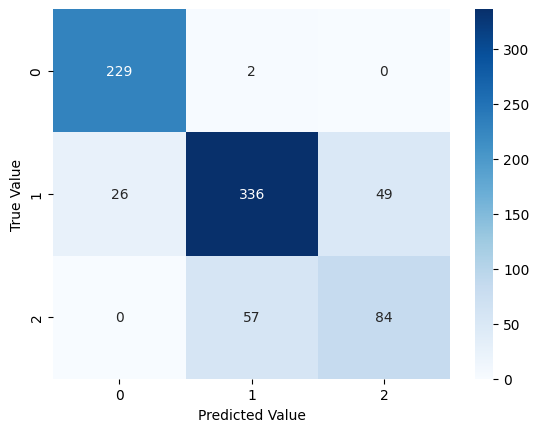

In [255]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
y_pred1 = grid.predict(X1)
print("\nConfusion Matrix for Test Set 1:")
print(confusion_matrix(y1.values, y_pred1))
print("\nClassification Report for Test Set 1:")
print(classification_report(y1.values, y_pred1))

conf_matrix1 = confusion_matrix(y1.values, y_pred1)
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*


Confusion Matrix for Test Set 2:
[[ 15   1   0]
 [  0 178  28]
 [  0  18  57]]

Classification Report for Test Set 2:
              precision    recall  f1-score   support

        rest       1.00      0.94      0.97        16
    straight       0.90      0.86      0.88       206
        turn       0.67      0.76      0.71        75

    accuracy                           0.84       297
   macro avg       0.86      0.85      0.85       297
weighted avg       0.85      0.84      0.84       297



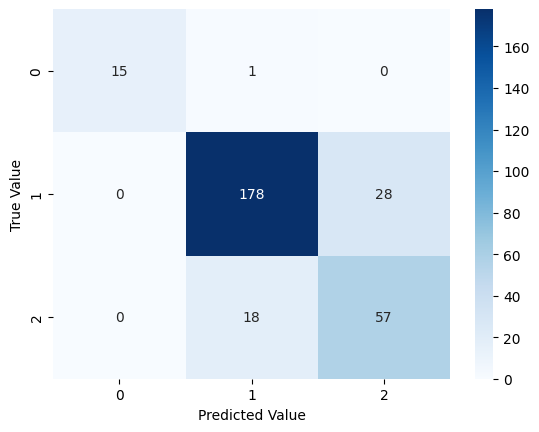

In [256]:
# TODO - Display confusion matrix and print classification report for (X2, y2)
y_pred2 = grid.predict(X2)
print("\nConfusion Matrix for Test Set 2:")
print(confusion_matrix(y2.values, y_pred2))
print("\nClassification Report for Test Set 2:")
print(classification_report(y2.values, y_pred2))

conf_matrix1 = confusion_matrix(y2.values, y_pred2)
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()

___

#### 3.2.3 Questions

1. Based on the observations across all three datasets, compare the performance of the model trained in this section to: (3 marks)
    1. Model trained in Section 1 using *all features*.
    1. Model trained in Section 2 using *selected features*.

2. Please proivde potential explanations for the differences observed in models' performances across the three sections. (3 marks)

#### 3.2.3 Answers
1.1 The model trained in this section using group selected features may show different performance compared to the models trained in Sections 1 and 2. The model in Section 1 used all available features, which may have provided more information for classification but also increased the risk of overfitting.
1.2 The model in Section 2 used a smaller set of selected features, which may have reduced overfitting but also limited the information available for classification.
2 Feature relevance: The relevance and importance of features used in each section may vary, affecting model performance.
- Overfitting: Using all available features (Section 1) may lead to overfitting, while using fewer selected features (Sections 2 and 3) may reduce overfitting.
- Data distribution: Differences in data distribution between training and test sets may impact model performance.
- Noise and variability: The presence of noise and variability in the data may affect model performance differently depending on the features used.

____

## Section 4 - Classification Using Principal Components of Features From Inertial Sensor Data (10 Marks)

____

### 4.1 Principal Component Analysis (PCA) Search with Cross Validation (4 Marks)

___

#### 4.1.1 Extract *ALL* features and target from *cv_set*

In [257]:
# TODO - Load all features from cv_set to X
X = cv_set.drop(columns=['motion_state'])

# Display first two rows of X
print("First two rows of X:")
X.head(2)

First two rows of X:


,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.003929,-0.093081,9.789349,-0.002649,0.001406,-0.001391,9.797418,0.022554,8.046094e-07,1.319665e-07,...,0.023871,0.000003,0.001496,0.000544,0.024992,0.000110,0.000075,0.000078,0.024997,0.000187
1,-0.000966,-0.092417,9.789095,-0.001806,0.000103,-0.001943,9.798815,0.021731,1.032619e-06,1.073067e-07,...,0.024153,0.000006,0.001865,0.000615,0.024828,0.000124,0.000098,0.000090,0.024829,0.000144


In [258]:
# TODO - Load motion_state column (target vector) into y
y = cv_set['motion_state']

___

#### 4.1.2 - Configure and Perform Grid Search with Cross-Validation

Similar to the steps from **1.2.2** and perform model training and tuning for an `SVC` model. Perform the `train_test_split`, initiate a `Pipeline`, then define the *Parameters* for `GridSearchCV`. Finally, perfrom the grid search.

In [259]:
# TODO - Perform model training and tuning using `GridSearchCV`
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In the `Pipeline` add an entry *'pca'* to apply `PCA`.

In [260]:
# Perform any missing imports
# TODO - Initiate the pipeline
# (1 marks)
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('svc', SVC())
])

Similar to previous sections, define the grid search configuration (*param_grid*). Add *n_components* hyper parameter tuning for PCA, and search over the values `n_components=[4,7,11,14,16]`.  

In [261]:
# TODO - Define the parameter grid for your model
# (3 marks)
param_grid = {
    'pca__n_components': [4, 7, 11, 14, 16],
    'svc__C': [0.01, 0.1, 1, 10, 100],
    'svc__gamma': [0.001, 0.01, 0.1, 1],
    'svc__kernel': ['rbf']
}

In [262]:
# Perform the grid search to train model and tune hyper parameters
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()), ('svc', SVC())]),
             param_grid={'pca__n_components': [4, 7, 11, 14, 16],
                         'svc__C': [0.01, 0.1, 1, 10, 100],
                         'svc__gamma': [0.001, 0.01, 0.1, 1],
                         'svc__kernel': ['rbf']},
             return_train_score=True, scoring='accuracy')

___

#### 4.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [263]:
# TODO: Print the results from the grid search

print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation train score: {:.2f}".format(grid.best_score_))
print("Best cross-validation validation score: {:.2f}".format(grid.cv_results_['mean_test_score'][grid.best_index_]))
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))

Best params:
{'pca__n_components': 16, 'svc__C': 100, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}

Best cross-validation train score: 0.94
Best cross-validation validation score: 0.94
Test-set score: 0.94


Display the confusion matrix and print the classification report for the trained model using the *test* split.


Confusion Matrix:
[[147   8   0]
 [  7 180  20]
 [  2  38  59]]

Classification Report:
              precision    recall  f1-score   support

        rest       0.94      0.95      0.95       155
    straight       0.80      0.87      0.83       207
        turn       0.75      0.60      0.66        99

    accuracy                           0.84       461
   macro avg       0.83      0.80      0.81       461
weighted avg       0.83      0.84      0.83       461



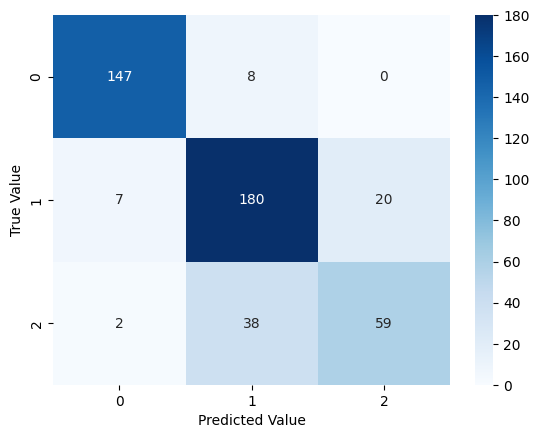

In [290]:
# TODO - Display confusion matrix and print classification report
y_pred = grid.predict(X_test)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test.values, y_pred))
print("\nClassification Report:")
print(classification_report(y_test.values, y_pred))

conf_matrix1 = confusion_matrix(y_test.values, y_pred)
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()

___

### 4.2 - Model Evaluation on Test Datasets 1 and 2 (6 Marks)

___

#### 4.2.1 - Extract group selected features and targets from test datasets

In [289]:
# TODO - Load the target vector from test_set1 into y1, and all features from test_set1 into X1
y1 = test_set1['motion_state']
X1 = test_set1.drop(columns=['motion_state'])

# Display first two rows of X1
print("First two rows of X1:")
X1.head(2)

First two rows of X1:


,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,0.264465,0.089904,9.786930,-0.002305,0.000218,-0.001143,9.801661,0.025634,0.000001,7.749919e-08,...,0.024056,0.000003,0.002506,0.000845,0.024884,0.000155,0.000078,0.000069,0.024886,0.000170
1,0.264300,0.088882,9.788127,-0.001865,-0.000523,-0.001999,9.802481,0.025218,0.000001,9.243000e-08,...,0.024084,0.000007,0.002427,0.000949,0.024881,0.000201,0.000095,0.000076,0.024883,0.000201


In [288]:
# TODO - Load the target vector from test_set2 into y2, and all features from test_set2 into X2
y2 = test_set2['motion_state']
X2 = test_set2.drop(columns=['motion_state'])

# Display first two rows of X2
print("First two rows of X2:")
X2.head(2)

First two rows of X2:


,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.046400,0.305907,9.791451,-0.002184,0.001311,-0.001901,9.800683,0.012437,0.000002,3.020959e-07,...,0.048406,0.000007,0.002575,0.002993,0.049701,0.000094,0.000115,0.000080,0.049764,0.000142
1,-0.050073,0.311947,9.785619,-0.003369,0.001898,-0.002051,9.797741,0.013805,0.000003,6.859937e-07,...,0.047696,0.000013,0.003880,0.004106,0.050477,0.000140,0.000140,0.000083,0.050763,0.000151


___

#### 4.2.2 - Visualize Results

In [267]:
# TODO - Print test score accuracies for test_set1 and test_set2
print("test_set1 score: {:.2f}".format(grid.score(X1, y1)))
print("test_set2 score: {:.2f}".format(grid.score(X2, y2)))

test_set1 score: 0.91
test_set2 score: 0.40



Confusion Matrix for Test Set 1:
[[226   5   0]
 [  4 359  48]
 [  0  65  76]]

Classification Report for Test Set 1:
              precision    recall  f1-score   support

        rest       0.98      0.98      0.98       231
    straight       0.84      0.87      0.85       411
        turn       0.61      0.54      0.57       141

    accuracy                           0.84       783
   macro avg       0.81      0.80      0.80       783
weighted avg       0.84      0.84      0.84       783



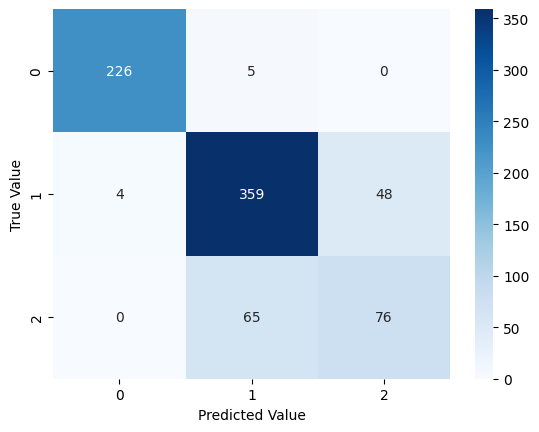

In [287]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
y_pred1 = grid.predict(X1)
print("\nConfusion Matrix for Test Set 1:")
print(confusion_matrix(y1.values, y_pred1))
print("\nClassification Report for Test Set 1:")
print(classification_report(y1.values, y_pred1))

conf_matrix1 = confusion_matrix(y1.values, y_pred1)
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*


Confusion Matrix for Test Set 2:
[[ 11   5   0]
 [  0 128  78]
 [  0   4  71]]

Classification Report for Test Set 2:
              precision    recall  f1-score   support

        rest       1.00      0.69      0.81        16
    straight       0.93      0.62      0.75       206
        turn       0.48      0.95      0.63        75

    accuracy                           0.71       297
   macro avg       0.80      0.75      0.73       297
weighted avg       0.82      0.71      0.72       297



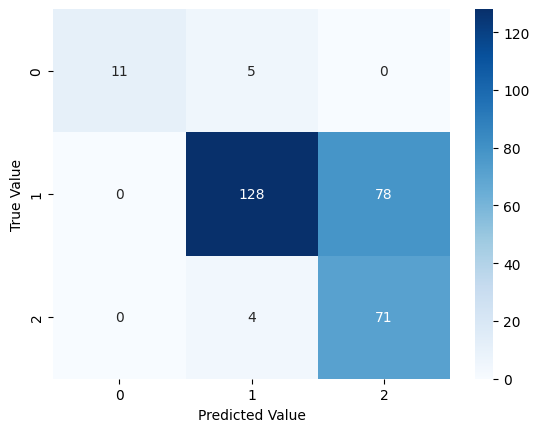

In [283]:
# TODO - Display confusion matrix and print classification report for (X2, y2)
y_pred2 = grid.predict(X2)
print("\nConfusion Matrix for Test Set 2:")
print(confusion_matrix(y2.values, y_pred2))
print("\nClassification Report for Test Set 2:")
print(classification_report(y2.values, y_pred2))

conf_matrix1 = confusion_matrix(y2.values, y_pred2)
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()

___

#### 4.2.3 - Questions

1. Based on the observations across all three datasets, compare the performance of the model with PCA, trained in this section to: (4 marks)
    * Model trained in Section 1 using *all features*.
    * Model trained in Section 2 using *selected features*.
    * Model trained in Section 3 using *group selected features*

2. Please provide potential explanations for the differences observed in models' performances across between section 1 and 4. (2 marks)

#### 4.2.3 - Answers
1.The model trained in this section using PCA may show different performance compared to the models trained in Sections 1, 2, and 3. PCA reduces the dimensionality of the data, which can help in reducing overfitting and improving generalization. However, it may also lead to loss of information if important features are not retained in the principal components.
2. Potential explanations for the differences observed in models' performances across the sections include:
- Dimensionality reduction: PCA reduces the number of features, which can help in reducing overfitting but may also lead to loss of important information.
- Feature relevance: The relevance and importance of features used in each section may vary, affecting model performance.
- Overfitting: Using all available features (Section 1) may lead to overfitting, while using fewer selected features (Sections 2 and 3) or PCA (Section 4) may reduce overfitting.
- Data distribution: Differences in data distribution between training and test sets may impact model performance.
- Noise and variability: The presence of noise and variability in the data may affect model performance differently depending on the features used and the dimensionality reduction technique applied.

____

## Section 5 - Classification Using *Pre Selected Features* Derived From Inertial Sensor Data (10 Marks)

___

Now, a second classifer is to be trained and tuned using grid search. The **selected features from section 2** must be used. You may choose from one of the algorithms discussed that class listed below.
1. Random Forest
1. K-Nearest Neighbors
1. Gradient Boosting Machines
1. Neural Networks

____

### 5.1 Grid Search with Cross Validation (6 Marks)

___

#### 5.1.1 Extract *Selected* features and target from *cv_set*

**Questions**
1. Please list the ML model that you have selected . And explain *why you have chosen* this model? (2 marks)

I have selected the Random Forest model. Random Forest is chosen because it is an ensemble learning method that combines multiple decision trees to improve the overall performance and robustness of the model. It is known for its ability to handle high-dimensional data, reduce overfitting, and provide feature importance, making it a suitable choice for this classification task.

In [270]:
# TODO - Load group selected features from cv_set to X
selected_features = ['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']
X = cv_set[selected_features]

# Display first two rows of X
print("First two rows of X:")
print(X.head(2))

First two rows of X:
         ax_var        ay_var    az_sum     a_sum        gz_var
0  8.046094e-07  1.319665e-07  9.789349  9.797418  7.446916e-10
1  1.032619e-06  1.073067e-07  9.789095  9.798815  6.983481e-10


In [271]:
# TODO - Load motion_state column (target vector) into y
y = cv_set['motion_state']

___

#### 5.1.2 - Configure and Perform Grid Search with Cross-Validation

Similar to the steps from **1.2.2** and perform model training and tuning using for the model selected. Perform the `train_test_split`, initiate a `Pipeline`, then define the *Parameters* for `GridSearchCV`. Finally, perfrom the grid search.

In [272]:
# TODO - Perform train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [273]:
# Perform any missing imports

# TODO - Initiate the pipeline
# (1 mark)
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier())
])

In [274]:
# TODO - Define the parameter grid for your model
# (3 marks)
param_grid = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [None, 10, 20, 30],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4]
}

In [275]:
# TODO - Perform the grid search
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('rf', RandomForestClassifier())]),
             param_grid={'rf__max_depth': [None, 10, 20, 30],
                         'rf__min_samples_leaf': [1, 2, 4],
                         'rf__min_samples_split': [2, 5, 10],
                         'rf__n_estimators': [50, 100, 200]},
             return_train_score=True, scoring='accuracy')

___

#### 5.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [276]:
# TODO: Print the results from the grid search

print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation train score: {:.2f}".format(grid.best_score_))
print("Best cross-validation validation score: {:.2f}".format(grid.cv_results_['mean_test_score'][grid.best_index_]))
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))

Best params:
{'rf__max_depth': 10, 'rf__min_samples_leaf': 4, 'rf__min_samples_split': 2, 'rf__n_estimators': 50}

Best cross-validation train score: 0.85
Best cross-validation validation score: 0.85
Test-set score: 0.84


Display the confusion matrix and print the classification report for the trained model using the *test* split.


Confusion Matrix:
[[147   8   0]
 [  7 180  20]
 [  2  38  59]]

Classification Report:
              precision    recall  f1-score   support

        rest       0.94      0.95      0.95       155
    straight       0.80      0.87      0.83       207
        turn       0.75      0.60      0.66        99

    accuracy                           0.84       461
   macro avg       0.83      0.80      0.81       461
weighted avg       0.83      0.84      0.83       461



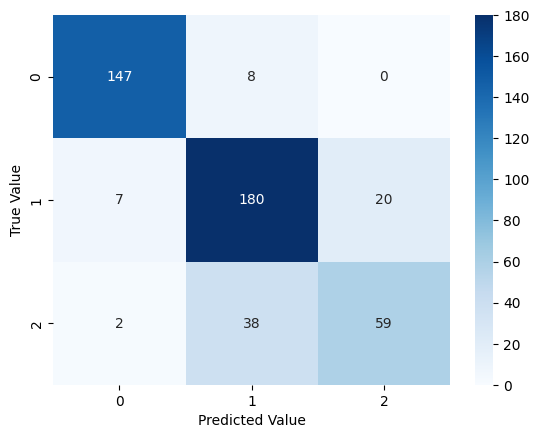

In [286]:
# TODO - Display confusion matrix and print classification report
y_pred = grid.predict(X_test)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test.values, y_pred))
print("\nClassification Report:")
print(classification_report(y_test.values, y_pred))

conf_matrix1 = confusion_matrix(y_test.values, y_pred)
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()

___

### 5.2 - Model Evaluation on Test Datasets 1 and 2 (4 Marks)

___

#### 5.2.1 - Extract selected features and targets from test datasets

The model trained in 5.1, is to be tested on the independent datasets, that is test_set1 and test_set2.
Seperate the testsets into features and target vectors *(X1, y1)* and *(X2,y2)*

In [278]:
# TODO - Load the target vector from test_set1 into y1, and the selected features from test_set1 into X1
y1 = test_set1['motion_state']
X1 = test_set1[selected_features]

# Display first two rows of X1
print("First two rows of X1:")
X1.head(2)

First two rows of X1:


,ax_var,ay_var,az_sum,a_sum,gz_var
0,0.000001,7.749919e-08,9.786930,9.801661,7.727190e-10
1,0.000001,9.243000e-08,9.788127,9.802481,8.871433e-10


In [279]:
# TODO - Load the target vector from test_set2 into y2, and the selected features from test_set2 into X2
y2 = test_set2['motion_state']
X2 = test_set2[selected_features]

# Display first two rows of X2
print("First two rows of X2:")
X2.head(2)

First two rows of X2:


,ax_var,ay_var,az_sum,a_sum,gz_var
0,0.000002,3.020959e-07,9.791451,9.800683,1.405038e-09
1,0.000003,6.859937e-07,9.785619,9.797741,1.164381e-09


___

#### 5.2.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [280]:
# TODO - Print test score accuracies for test_set1 and test_set2
print("test_set1 score: {:.2f}".format(grid.score(X1, y1)))
print("test_set2 score: {:.2f}".format(grid.score(X2, y2)))

test_set1 score: 0.84
test_set2 score: 0.71


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*


Confusion Matrix for Test Set 1:
[[226   5   0]
 [  4 359  48]
 [  0  65  76]]

Classification Report for Test Set 1:
              precision    recall  f1-score   support

        rest       0.98      0.98      0.98       231
    straight       0.84      0.87      0.85       411
        turn       0.61      0.54      0.57       141

    accuracy                           0.84       783
   macro avg       0.81      0.80      0.80       783
weighted avg       0.84      0.84      0.84       783



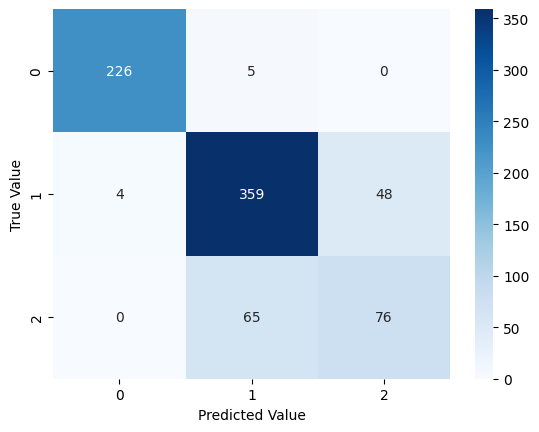

In [285]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
y_pred1 = grid.predict(X1)
print("\nConfusion Matrix for Test Set 1:")
print(confusion_matrix(y1.values, y_pred1))
print("\nClassification Report for Test Set 1:")
print(classification_report(y1.values, y_pred1))

conf_matrix1 = confusion_matrix(y1.values, y_pred1)
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*


Confusion Matrix for Test Set 2:
[[ 11   5   0]
 [  0 128  78]
 [  0   4  71]]

Classification Report for Test Set 2:
              precision    recall  f1-score   support

        rest       1.00      0.69      0.81        16
    straight       0.93      0.62      0.75       206
        turn       0.48      0.95      0.63        75

    accuracy                           0.71       297
   macro avg       0.80      0.75      0.73       297
weighted avg       0.82      0.71      0.72       297



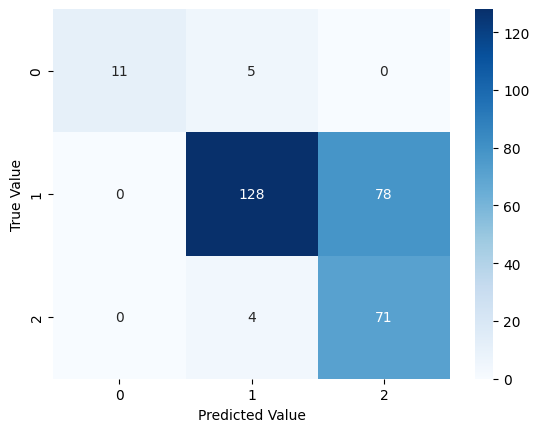

In [284]:
# TODO - Display confusion matrix and print classification report for (X2, y2)
y_pred2 = grid.predict(X2)
print("\nConfusion Matrix for Test Set 2:")
print(confusion_matrix(y2.values, y_pred2))
print("\nClassification Report for Test Set 2:")
print(classification_report(y2.values, y_pred2))

conf_matrix1 = confusion_matrix(y2.values, y_pred2)
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()

___

#### 5.2.3 Question

1. For the model trainied in this section, compare its performance to the performance of SVC which was also trained with the same selected features (section 2). Which model fits better? Explain causes for any observed discrepancies? (4 marks)

The performance of the Random Forest model trained in this section can be compared to the SVC model trained in Section 2 by evaluating their accuracy scores, confusion matrices, and classification reports on the same test datasets. The model that achieves higher accuracy and better classification metrics (precision, recall, F1-score) on the test datasets is considered to fit better.

Potential causes for observed discrepancies in performance include:
- Model Complexity: Random Forest is an ensemble method that combines multiple decision trees, which can capture more complex patterns in the data compared to a single SVC model.
- Overfitting: SVC may overfit the training data if not properly tuned, while Random Forest tends to be more robust against overfitting due to its ensemble nature.
- Feature Importance: Random Forest provides feature importance, which can help in understanding which features contribute most to the classification, potentially leading to better model interpretability.
- Data Distribution: Differences in data distribution between training and test sets may impact the performance of both models differently.


____